In [17]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
# read the data file into a dataframe
df = pd.read_csv('machine_data-1.csv')
print(df)

print(df.shape)

      Unnamed: 0       time       load manufacturer
0              0  20.008150  70.446291            c
1              1  14.014561  73.294634            c
2              2  26.701731  73.840790            A
3              3  14.809997  77.084801            B
4              4  10.626743  75.508418            c
...          ...        ...        ...          ...
1224        1224  11.964054  74.560155            c
1225        1225   9.787055  76.166923            c
1226        1226  22.561823  75.862420            A
1227        1227  25.499175  74.393778            A
1228        1228  13.919766  77.704726            B

[1229 rows x 4 columns]
(1229, 4)


In [4]:
#Drop the index
df.drop(df.columns[0],axis=1)

,time,load,manufacturer
0,20.008150,70.446291,c
1,14.014561,73.294634,c
2,26.701731,73.840790,A
3,14.809997,77.084801,B
4,10.626743,75.508418,c
...,...,...,...
1224,11.964054,74.560155,c
1225,9.787055,76.166923,c
1226,22.561823,75.862420,A
1227,25.499175,74.393778,A


In [5]:
#Extract data for a given manufacturer
grpByManu = df.groupby(['manufacturer'])

dfa = grpByManu.get_group(('A',))
dfb = grpByManu.get_group(('B',))
dfc = grpByManu.get_group(('c',))

In [6]:
loada = dfa['load']
timea = dfa['time']
loadb = dfb['load']
timeb = dfb['time']
loadc = dfc['load']
timec = dfc['time']

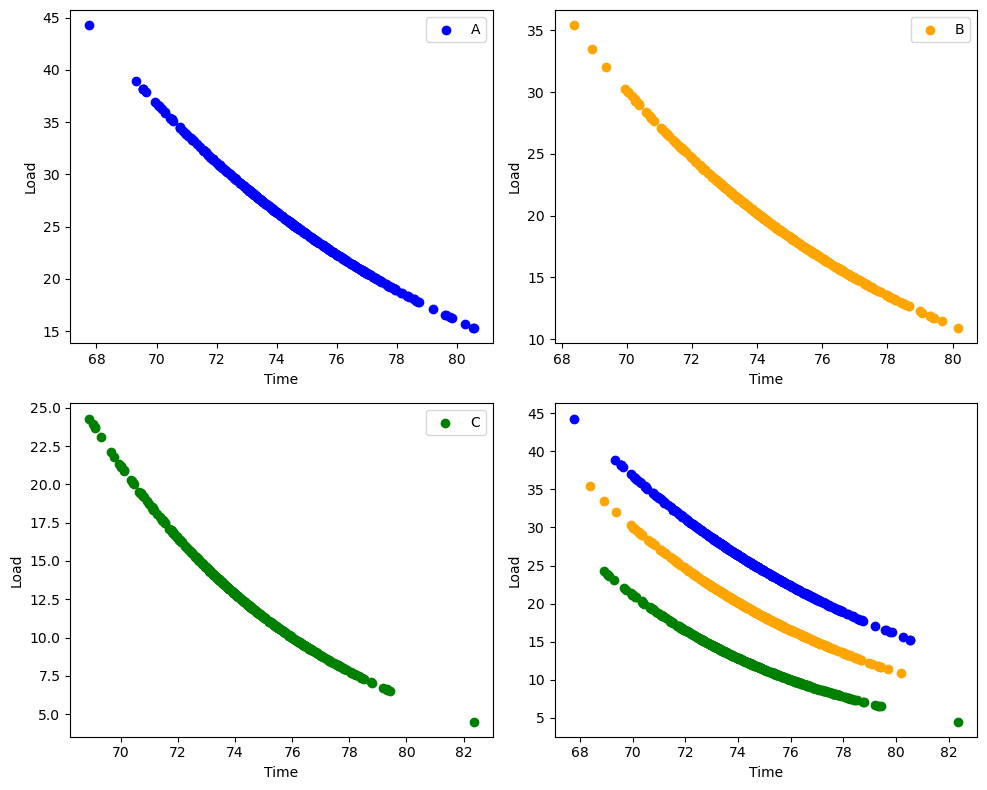

In [7]:
#Is there a relationship between load and time
figure,axis = plt.subplots(2,2, figsize=(10, 8))
axis[0, 0].scatter(loada, timea, color="blue", label="A")
axis[0, 0].legend()
axis[0, 0].set_xlabel("Time")
axis[0, 0].set_ylabel("Load")

axis[0, 1].scatter(loadb, timeb, color="orange", label="B")
axis[0, 1].legend()
axis[0, 1].set_xlabel("Time")
axis[0, 1].set_ylabel("Load")

axis[1, 0].scatter(loadc, timec, color="green", label="C")
axis[1, 0].legend()
axis[1, 0].set_xlabel("Time")
axis[1, 0].set_ylabel("Load")

axis[1, 1].scatter(loada, timea, color="blue")
axis[1, 1].scatter(loadb, timeb, color="orange")
axis[1, 1].scatter(loadc, timec, color="green")
axis[1, 1].set_xlabel("Time")
axis[1, 1].set_ylabel("Load")
plt.tight_layout()
plt.show()

### 1. What is the range of load and time during operation for each manufacturer?

In [8]:
print(dfa[['load', 'time']].describe())
print(dfb[['load', 'time']].describe())
print(dfc[['load', 'time']].describe())

             load        time
count  415.000000  415.000000
mean    74.497625   25.685249
std      2.146885    4.614101
min     67.770206   15.276417
25%     73.130892   22.346025
50%     74.464071   25.350244
75%     75.977757   28.329017
max     80.541808   44.283424
             load        time
count  403.000000  403.000000
mean    74.686092   19.230276
std      2.058642    4.049431
min     68.364413   10.881338
25%     73.373177   16.424144
50%     74.690345   18.816761
75%     76.050307   21.465888
max     80.167333   35.422287
             load        time
count  411.000000  411.000000
mean    74.376665   12.696966
std      2.167851    3.480629
min     68.892794    4.519349
25%     72.995104   10.073778
50%     74.335344   12.305028
75%     75.935922   14.549230
max     82.348464   24.296367


### 2. What is the most expected load value?

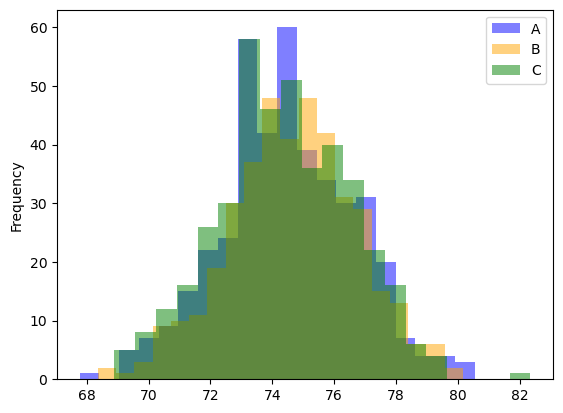

In [21]:
dfa['load'].plot(kind='hist', bins=20, alpha=0.5, label='A', color='blue')
dfb['load'].plot(kind='hist', bins=20, alpha=0.5, label='B', color='orange')
dfc['load'].plot(kind='hist', bins=20, alpha=0.5, label='C', color='green')
plt.legend()
plt.show()

### 3. How are the load and time related?

### 4. Which distribution best describes the load?

Compare with known distributions (normal, exponential, Weibull).
scipy.stats can be good here for fitting the distributions.

### 5. Which distribution best describes the time?

### 6. Which manufacturer has the best performance and why?

25.685249066048193 19.230276397791563 12.696966214481753


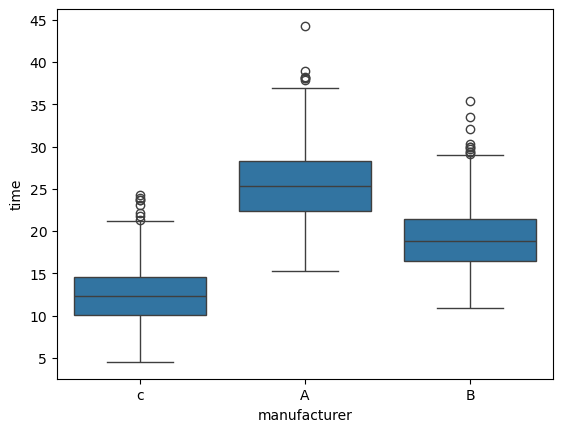

In [ ]:

#Compare average operation time:
print(dfa['time'].mean(), dfb['time'].mean(), dfc['time'].mean())
#Boxplot show performance:
sns.boxplot(x=df['manufacturer'], y=df['time'])
plt.show()

Explain the results:
Which manufacturer lasts the longest?
Is performance affected by load?